In [1]:
pip install geopandas

     |████████████████████████████████| 1.0MB 5.6MB/s 
     |████████████████████████████████| 6.5MB 9.5MB/s 
     |████████████████████████████████| 15.3MB 268kB/s 


In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
from shapely.geometry import Point
import geopy.distance
from geopy import distance
from geopy import Point
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import json
import urllib
import urllib.request

In [3]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from enum import Enum

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
pip install pysal

     |████████████████████████████████| 2.4MB 5.9MB/s 
     |████████████████████████████████| 112kB 24.5MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 92kB 7.4MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 215kB 21.4MB/s 
     |████████████████████████████████| 5.7MB 16.4MB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 153kB 49.3MB/s 
     |████████████████████████████████| 235kB 45.8MB/s 
     |████████████████████████████████| 235kB 42.2MB/s 
     |████████████████████████████████| 56.4MB 68kB/s 
     |████████████████████████████████| 1.0MB 42.6MB/s 
     |████████████████████████████████| 19.1MB 1.3MB/s 
     |████████████████████████████████| 2.1MB 43.1MB/s 
     |████████████████████████████████| 40.6MB 1.4MB/s 
     |

In [5]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [185]:
sf = pd.read_csv('/content/drive/MyDrive/exports/SF_ele_single station.csv' , index_col=0 )
sf.head()

,lat,lng,elevation
station_id,,,
SF-M26,37.767088,-122.407380,12
SF-M25,37.767100,-122.410662,15
SF-M26-2,37.768568,-122.404238,4
SF-L27,37.771075,-122.402732,4
SF-K26,37.771461,-122.405788,4


In [7]:
sf.columns

Index(['lat', 'lng', 'elevation'], dtype='object')

In [8]:
sf_ele= sf[['elevation']]
sf_ele.head()

,elevation
station_id,
SF-M26,12
SF-M25,15
SF-M26-2,4
SF-L27,4
SF-K26,4


In [9]:
gdf_dt= gpd.GeoDataFrame(sf,geometry=gpd.points_from_xy(sf.lng, sf.lat)).set_crs('EPSG:4326')
gdf_dt.head()

,lat,lng,elevation,geometry
station_id,,,,
SF-M26,37.767088,-122.407380,12,POINT (-122.40738 37.76709)
SF-M25,37.767100,-122.410662,15,POINT (-122.41066 37.76710)
SF-M26-2,37.768568,-122.404238,4,POINT (-122.40424 37.76857)
SF-L27,37.771075,-122.402732,4,POINT (-122.40273 37.77108)
SF-K26,37.771461,-122.405788,4,POINT (-122.40579 37.77146)


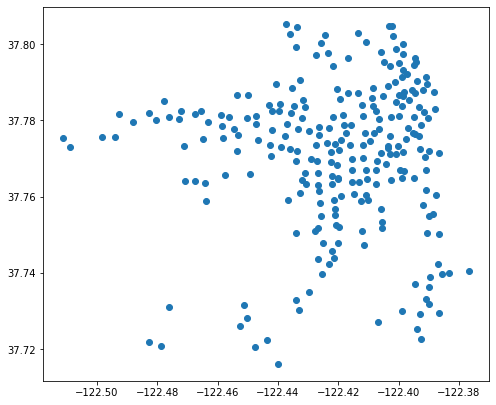

In [10]:
gdf_dt.plot(figsize=(8,8))

In [11]:
zipcode = gpd.read_file('/content/drive/MyDrive/data (1)/shapefiles (1)/zipcodes (1)/san_francisco (1).shp')

In [12]:
zipcode.head()

,area,length,po_name,state,zip,geometry
0,3.690611e+07,33638.933160,SAN FRANCISCO,CA,94103,"POLYGON ((-122.42641 37.76467, -122.42653 37.7..."
1,2.923981e+07,30323.948555,SAN FRANCISCO,CA,94109,"POLYGON ((-122.41195 37.78886, -122.41188 37.7..."
2,3.056166e+07,24300.439024,SAN FRANCISCO,CA,94115,"POLYGON ((-122.42851 37.77906, -122.42998 37.7..."
3,1.238288e+07,26722.984980,SAN FRANCISCO,CA,94105,"POLYGON ((-122.40355 37.78757, -122.40340 37.7..."
4,1.960458e+06,7187.004374,SAN FRANCISCO,CA,94104,"POLYGON ((-122.40340 37.78768, -122.40387 37.7..."


In [13]:
from sklearn.mixture import GaussianMixture 

In [14]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

In [15]:
def silhouette_score_plot(data,range_n_clusters):
    X=data
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6932313750733121


TypeError: ignored

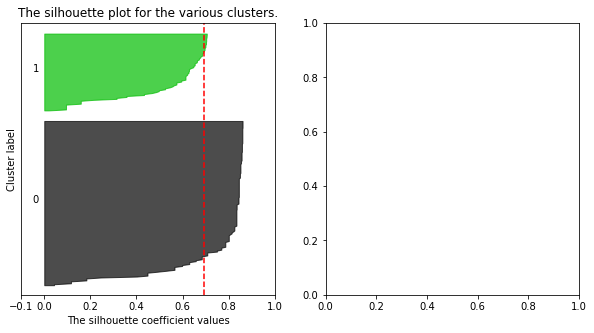

In [16]:
silhouette_score_plot(sf_ele,range(2,6))

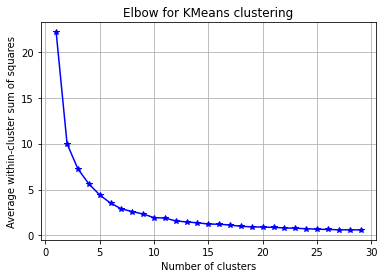

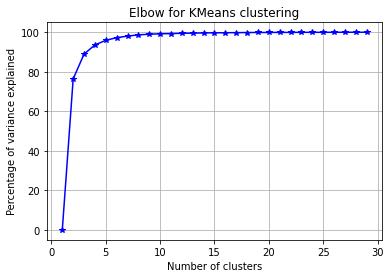

In [17]:
elbow(sf_ele, range(1,30))

cbike and ebike uses counts by stations

In [226]:
ebike1 = pd.read_csv('/content/drive/MyDrive/exports/sf_ebike_lat.csv' , index_col=0 )
cbike1 = pd.read_csv('/content/drive/MyDrive/exports/sf_cbike_lat.csv' , index_col=0 )
ebike2 = pd.read_csv('/content/drive/MyDrive/exports/sf_ebike_id.csv' , index_col=0 )
cbike2 = pd.read_csv('/content/drive/MyDrive/exports/sf_cbike_id.csv' , index_col=0 )
sf_idwloc=pd.read_csv('/content/drive/MyDrive/exports/sf_idwithloc.csv' , index_col=0 )
sf_idwloc

,start_station_id,start_lat,start_lng
10561,SF-K28,37.775214,-122.397477
10562,SF-O25-1,37.760437,-122.410778
10564,SF-Q26,37.753243,-122.405496
10566,SF-K17-2,37.770525,-122.442360
10567,SF-J18,37.775956,-122.437713
...,...,...,...
102681,SF-L26,37.769257,-122.407029
102689,EM-B2,37.838444,-122.288665
102763,SF-I21,37.778325,-122.426443
102783,SF-O23,37.760282,-122.419027


In [20]:
sf_full = pd.read_csv('/content/drive/MyDrive/exports/SF_full.csv' , index_col=0 )
sf_full.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
4029,BD19F002C21065E0,classic_bike,2021-02-26 15:29:27,2021-02-26 15:31:14,Vine St at Shattuck Ave,BK-A7,Vine St at Shattuck Ave,BK-A7,37.880222,-122.269592,37.880222,-122.269592,casual
4052,6D4ED519944CC5E5,classic_bike,2021-02-24 15:06:14,2021-02-24 15:39:29,Vine St at Shattuck Ave,BK-A7,Vine St at Shattuck Ave,BK-A7,37.880222,-122.269592,37.880222,-122.269592,casual
10561,072879C2ED883CF1,classic_bike,2021-02-12 19:08:22,2021-02-12 19:15:02,Townsend St at 5th St,SF-K28,Mississippi St at 17th St,SF-N29,37.775214,-122.397477,37.764793,-122.394796,member
10562,25D1A5D72C59C493,classic_bike,2021-02-28 10:34:39,2021-02-28 11:00:01,19th St at Florida St,SF-O25-1,2nd St at Folsom St,SF-H29,37.760437,-122.410778,37.785318,-122.396434,member
10563,5D7DCF49E7C54D43,electric_bike,2021-02-14 13:44:57,2021-02-14 13:51:55,19th St at Florida St,SF-O25-1,Bryant St at 15th St,SF-M25,37.760437,-122.410778,37.767100,-122.410662,member


In [33]:
sf_ebike= sf_full.loc[sf_full['rideable_type'].isin (['electric_bike'])]
sf_cbike= sf_full.loc[sf_full['rideable_type'].isin (['classic_bike'])]

In [225]:
cbike2.head()

,start_station_id,end_station_id,displacement,duration,velocity,count
0,BK-A3,BK-D1,4440.861745,1596.0,2.782495,1
1,BK-A3,BK-D10,2002.571655,537.5,3.743938,2
2,BK-A3,BK-E8,2168.859277,627.5,3.477121,2
3,BK-A3,BK-E9-2,1719.286872,1067.5,2.062049,2
4,BK-A3,BK-F10,1161.116151,481.5,2.415021,2


In [228]:
ebike2.head()

,start_station_id,end_station_id,displacement,duration,velocity,count
0,SF I29-1,SF-A20,4246.657658,1751.0,2.425276,1
1,SF I29-1,SF-C20,3997.653612,1790.0,2.233326,1
2,SF I29-1,SF-C21,3384.185040,1426.0,2.373201,1
3,SF I29-1,SF-C28-2,1821.659008,626.0,2.909998,1
4,SF I29-1,SF-D27,1667.228247,802.0,2.078838,1


In [236]:
ebike_count=ebike2.groupby(by='start_station_id', as_index=False).sum()[['start_station_id','count']]
ebike_count.rename(columns={'count':'ebike_trips'}, inplace=True)
ebike_count

,start_station_id,ebike_trips
0,SF I29-1,98
1,SF-A19,67
2,SF-A20,166
3,SF-A27,78
4,SF-AA15,8
...,...,...
321,SJ-Q11,6
322,SJ-Q4,6
323,SJ-Q5,3
324,SJ-Q8,4


In [262]:
cbike_count=cbike2.groupby(by='start_station_id', as_index=False).sum()[['start_station_id','count']]
cbike_count.rename(columns={'count':'cbike_trips'}, inplace=True)
cbike_count

,start_station_id,cbike_trips
0,BK-A3,41
1,BK-A7,70
2,BK-B7,65
3,BK-C1,42
4,BK-C5,33
...,...,...
440,SJ-Q11,3
441,SJ-Q4,6
442,SJ-Q5,2
443,SJ-Q8,2


In [263]:
bikeCount= cbike_count.merge(ebike_count,left_on='start_station_id', right_on='start_station_id',how='left')
bikeCount

,start_station_id,cbike_trips,ebike_trips
0,BK-A3,41,NaN
1,BK-A7,70,NaN
2,BK-B7,65,NaN
3,BK-C1,42,NaN
4,BK-C5,33,NaN
...,...,...,...
440,SJ-Q11,3,6.0
441,SJ-Q4,6,6.0
442,SJ-Q5,2,3.0
443,SJ-Q8,2,4.0


In [264]:
bikeCount= bikeCount.fillna(0)

In [265]:
bikeCount['cbikenom']=bikeCount['cbike_trips']/(bikeCount['cbike_trips']+bikeCount['ebike_trips'])
bikeCount['ebikenom']=bikeCount['ebike_trips']/(bikeCount['cbike_trips']+bikeCount['ebike_trips'])

In [266]:
bikeCount=sf.merge(bikeCount,left_on='station_id', right_on='start_station_id')
bikeCount

,lat,lng,elevation,start_station_id,cbike_trips,ebike_trips,cbikenom,ebikenom
0,37.767088,-122.407380,12,SF-M26,40,23.0,0.634921,0.365079
1,37.767100,-122.410662,15,SF-M25,69,133.0,0.341584,0.658416
2,37.768568,-122.404238,4,SF-M26-2,120,169.0,0.415225,0.584775
3,37.771075,-122.402732,4,SF-L27,52,73.0,0.416000,0.584000
4,37.771461,-122.405788,4,SF-K26,120,196.0,0.379747,0.620253
...,...,...,...,...,...,...,...,...
247,37.722397,-122.443780,56,SF-Z16,2,2.0,0.500000,0.500000
248,37.725982,-122.452461,99,SF-Y14,3,13.0,0.187500,0.812500
249,37.728297,-122.450401,102,SF-X14,3,6.0,0.333333,0.666667
250,37.730158,-122.432900,37,SF-X19,1,8.0,0.111111,0.888889


In [267]:
bikenom= bikeCount[['start_station_id',	'cbikenom',	'ebikenom']]
bikenom=bikenom.set_index('start_station_id')
bikenom

,cbikenom,ebikenom
start_station_id,,
SF-M26,0.634921,0.365079
SF-M25,0.341584,0.658416
SF-M26-2,0.415225,0.584775
SF-L27,0.416000,0.584000
SF-K26,0.379747,0.620253
...,...,...
SF-Z16,0.500000,0.500000
SF-Y14,0.187500,0.812500
SF-X14,0.333333,0.666667


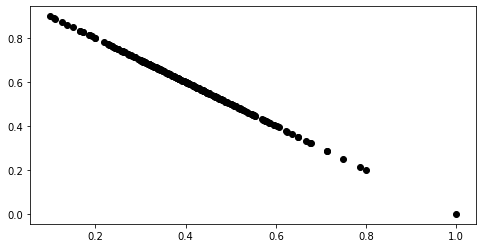

In [268]:
X= bikenom.values
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],c="k")
plt.show()

In [269]:
def Kmean_range(n,dt):
 for n_clusters in range(2,n): #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(dt)
    #report average Silhouette score
    silhouette_avg = silhouette_score(dt, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))
    

In [270]:
def GaussianMixture_range(n,dt):
 for n_clusters in range(2,n):
    km = GaussianMixture(n_components=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(sf_new)
    #report average Silhouette score
    silhouette_avg = silhouette_score(sf_new, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

In [271]:
Kmean_range(10,bikenom)

For n_clusters =2, the average silhouette_score is :0.5438495528661443
For n_clusters =3, the average silhouette_score is :0.5174992911837744
For n_clusters =4, the average silhouette_score is :0.532647602925826
For n_clusters =5, the average silhouette_score is :0.5410411463924804
For n_clusters =6, the average silhouette_score is :0.5130333303624013
For n_clusters =7, the average silhouette_score is :0.5097561294654123
For n_clusters =8, the average silhouette_score is :0.5342058121907817
For n_clusters =9, the average silhouette_score is :0.5510531324935946


In [272]:
GaussianMixture_range(10,bikenom)

For n_clusters =2, the average silhouette_score is :0.490899684691279
For n_clusters =3, the average silhouette_score is :0.42471074069385323
For n_clusters =4, the average silhouette_score is :0.3839792666641849
For n_clusters =5, the average silhouette_score is :0.4076582414730796
For n_clusters =6, the average silhouette_score is :0.37250604414661215
For n_clusters =7, the average silhouette_score is :0.3846828067678665
For n_clusters =8, the average silhouette_score is :0.4327684074444098
For n_clusters =9, the average silhouette_score is :0.4474197181771069


In [247]:
def KMean_get(n,dt):
 rr = KMeans(n_clusters = n, random_state = 0).fit(dt)
 rr.labels_ = rr.predict(dt) 
 clust={dt.index[i]:rr.labels_[i] for i in range(len(rr.labels_))}
 res3=pd.DataFrame({'id':dt.index, 'label':rr.labels_})
 return res3

In [273]:
KMean_get(5,bikenom)

,id,label
0,SF-M26,1
1,SF-M25,0
2,SF-M26-2,3
3,SF-L27,3
4,SF-K26,0
...,...,...
247,SF-Z16,1
248,SF-Y14,2
249,SF-X14,0
250,SF-X19,2


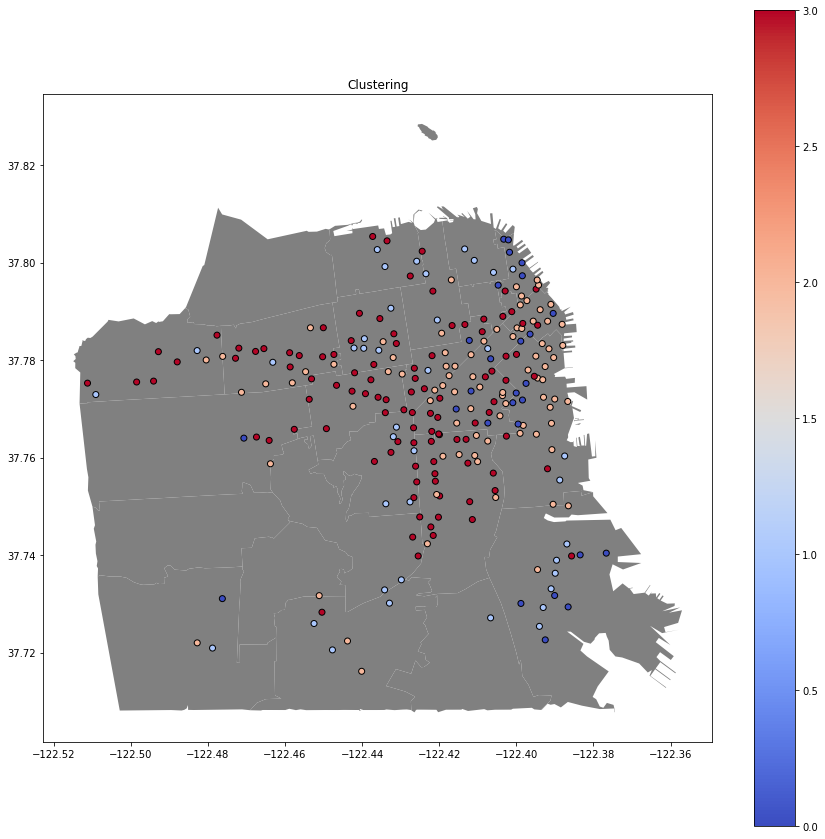

In [274]:
sf_merge=sf.merge(KMean_get(4,bikenom),left_on='station_id', right_on='id')
gdf_dt3= gpd.GeoDataFrame(sf_merge,geometry=gpd.points_from_xy(sf_merge.lng, sf_merge.lat)).set_crs('EPSG:4326')
plot_stations(zipcode, gdf_dt3, 'label', 'Clustering')

SF_ebike _in and out count

In [186]:
sf_new = pd.read_csv('/content/drive/MyDrive/data/full.csv' , index_col=0 )
sf_new.head()

,in,out,diff
station_id,,,
SF-M26,557,488,69
SF-M25,1723,1704,19
SF-M26-2,2466,2224,242
SF-L27,961,975,-14
SF-K26,3164,2580,584


In [197]:
sf_new2= sf_new[['diff']]

sf_new2=sf_new2.merge(sf,left_index=True, right_index=True, how='inner')
sf_new2= sf_new2[['diff','elevation']]
sf_new2

,diff,elevation
station_id,,
SF-M26,69,12
SF-M25,19,15
SF-M26-2,242,4
SF-L27,-14,4
SF-K26,584,4
...,...,...
SF-Z16,25,56
SF-Y14,-56,99
SF-X14,-39,102


n_clusters =3, the average silhouette_score is :0.657

The highest silhouette_score for in_out difference

In [198]:
Kmean_range(10,sf_new2)

For n_clusters =2, the average silhouette_score is :0.5045810856583804
For n_clusters =3, the average silhouette_score is :0.6571158824843378
For n_clusters =4, the average silhouette_score is :0.5075640356535254
For n_clusters =5, the average silhouette_score is :0.533840020780528
For n_clusters =6, the average silhouette_score is :0.5364835813396797
For n_clusters =7, the average silhouette_score is :0.535494187832017
For n_clusters =8, the average silhouette_score is :0.5440906037033643
For n_clusters =9, the average silhouette_score is :0.4995655369364256


In [199]:
GaussianMixture_range(10,sf_new2)

For n_clusters =2, the average silhouette_score is :0.490899684691279
For n_clusters =3, the average silhouette_score is :0.42471074069385323
For n_clusters =4, the average silhouette_score is :0.3839792666641849
For n_clusters =5, the average silhouette_score is :0.4076582414730796
For n_clusters =6, the average silhouette_score is :0.37250604414661215
For n_clusters =7, the average silhouette_score is :0.3846828067678665
For n_clusters =8, the average silhouette_score is :0.4327684074444098
For n_clusters =9, the average silhouette_score is :0.4474197181771069


In [200]:
def plot_stations(zips_gdf, stations_gdf, column, title):
    fig, ax = plt.subplots(figsize=(15, 15))
    zips_gdf.plot(ax=ax, color='grey')
    norm = matplotlib.colors.Normalize()
    stations_gdf.plot(ax=ax,
            column=column,
            norm=norm,
            legend=True,
            cmap='coolwarm',
            edgecolors='black')
    ax.set_title(title)
    plt.show()

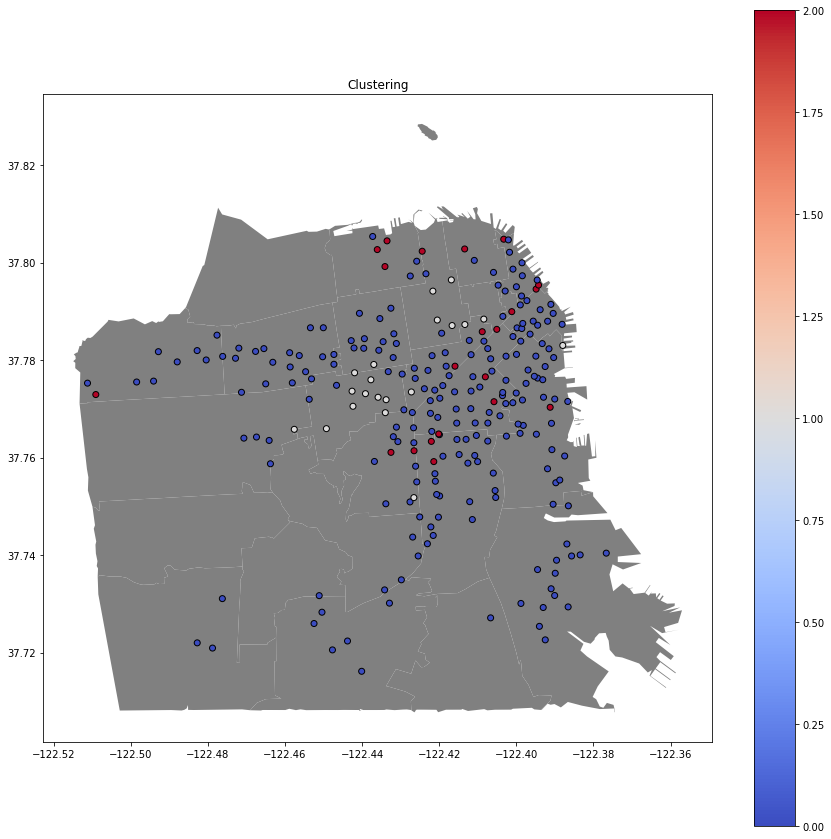

In [201]:
sf_merge2=sf.merge(KMean_get(3,sf_new2),left_on='station_id', right_on='id')
gdf_dt3= gpd.GeoDataFrame(sf_merge2,geometry=gpd.points_from_xy(sf_merge2.lng, sf_merge2.lat)).set_crs('EPSG:4326')
plot_stations(zipcode, gdf_dt3, 'label', 'Clustering')

in_out Kmean clustering

In [174]:
sf_new= sf_new[['in','out']]
sf_new.head()

,in,out
station_id,,
SF-M26,557,488
SF-M25,1723,1704
SF-M26-2,2466,2224
SF-L27,961,975
SF-K26,3164,2580


In [180]:
KMean_get(3,sf_new2)

,id,label
0,SF-M26,0
1,SF-M25,0
2,SF-M26-2,0
3,SF-L27,0
4,SF-K26,2
...,...,...
248,SF-Z16,0
249,SF-Y14,0
250,SF-X14,0
251,SF-X19,0


In [175]:
Kmean_range(10,sf_new)

For n_clusters =2, the average silhouette_score is :0.5867338236803925
For n_clusters =3, the average silhouette_score is :0.5412506895176915
For n_clusters =4, the average silhouette_score is :0.5572815679609402
For n_clusters =5, the average silhouette_score is :0.5490097137521527
For n_clusters =6, the average silhouette_score is :0.5116233314876751
For n_clusters =7, the average silhouette_score is :0.5104207058775284
For n_clusters =8, the average silhouette_score is :0.5136012828465002
For n_clusters =9, the average silhouette_score is :0.5157520957991473


In [176]:
GaussianMixture_range(10,sf_new)

For n_clusters =2, the average silhouette_score is :0.4957925238594009
For n_clusters =3, the average silhouette_score is :0.43826394769730975
For n_clusters =4, the average silhouette_score is :0.40383368127606273
For n_clusters =5, the average silhouette_score is :0.42695333976893596
For n_clusters =6, the average silhouette_score is :0.4295142974341364
For n_clusters =7, the average silhouette_score is :0.472507315995327
For n_clusters =8, the average silhouette_score is :0.42825996258281873
For n_clusters =9, the average silhouette_score is :0.5069813692655558


In [48]:
KMean_get(4,sf_new)

,id,label
0,SF-M26,0
1,SF-M25,3
2,SF-M26-2,3
3,SF-L27,0
4,SF-K26,2
...,...,...
248,SF-Z16,0
249,SF-Y14,0
250,SF-X14,0
251,SF-X19,0


3_Clustering by station elevation

In [52]:
range_n_clusters = [2, 3, 4, 5,6,7,8,9,10]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = GaussianMixture(n_components=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(sf_ele)
    #report average Silhouette score
    silhouette_avg = silhouette_score(sf_ele, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.5959248390300971
For n_clusters =3, the average silhouette_score is :0.5951194565622665
For n_clusters =4, the average silhouette_score is :0.5434484681392069
For n_clusters =5, the average silhouette_score is :0.5468633928913825
For n_clusters =6, the average silhouette_score is :0.5482588784645742
For n_clusters =7, the average silhouette_score is :0.5851562079363685
For n_clusters =8, the average silhouette_score is :0.604732482990755
For n_clusters =9, the average silhouette_score is :0.6167821981897742
For n_clusters =10, the average silhouette_score is :0.6051123429059283


In [53]:
range_n_clusters = [2, 3, 4, 5,6,7,8,9,10]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters, random_state=324)
    cluster_labels = km.fit_predict(sf_ele)
    #report average Silhouette score
    silhouette_avg = silhouette_score(sf_ele, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.6932313750733121
For n_clusters =3, the average silhouette_score is :0.6566316325331474
For n_clusters =4, the average silhouette_score is :0.6286368186828678
For n_clusters =5, the average silhouette_score is :0.5958487993009394
For n_clusters =6, the average silhouette_score is :0.5996431356652081
For n_clusters =7, the average silhouette_score is :0.6008762312851544
For n_clusters =8, the average silhouette_score is :0.6156311244496662
For n_clusters =9, the average silhouette_score is :0.6313748179957491
For n_clusters =10, the average silhouette_score is :0.5933461464196911


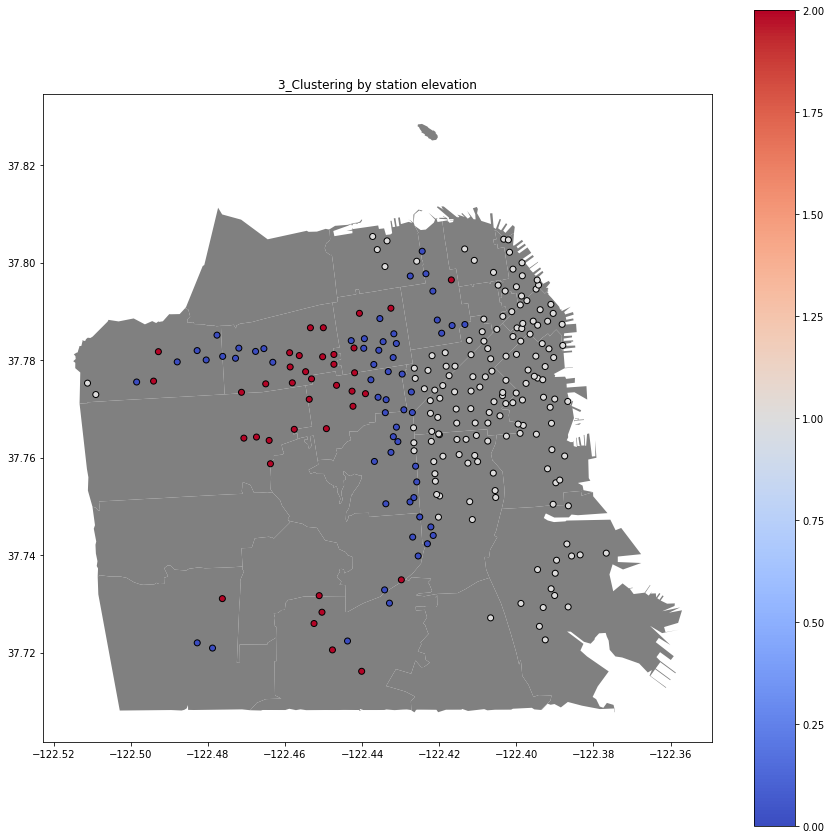

In [71]:
sf_merge2=sf.merge(KMean_get(3,sf_ele),left_on='station_id', right_on='id')
gdf_dt3= gpd.GeoDataFrame(sf_merge2,geometry=gpd.points_from_xy(sf_merge2.lng, sf_merge2.lat)).set_crs('EPSG:4326')
plot_stations(zipcode, gdf_dt3, 'label', '3_Clustering by station elevation')

9_GaussianMixture clustering by station elevation

In [55]:
rr9 = GaussianMixture(n_components = 9, random_state = 0).fit(sf_ele)
rr9.labels_ = rr9.predict(sf_ele) 
clust={sf_ele.index[i]:rr9.labels_[i] for i in range(len(rr9.labels_))}
res2=pd.DataFrame({'geometry':sf_ele.index, 'label':rr9.labels_})
res2

,geometry,label
0,SF-M26,8
1,SF-M25,0
2,SF-M26-2,2
3,SF-L27,2
4,SF-K26,2
...,...,...
248,SF-Z16,6
249,SF-Y14,7
250,SF-X14,7
251,SF-X19,3


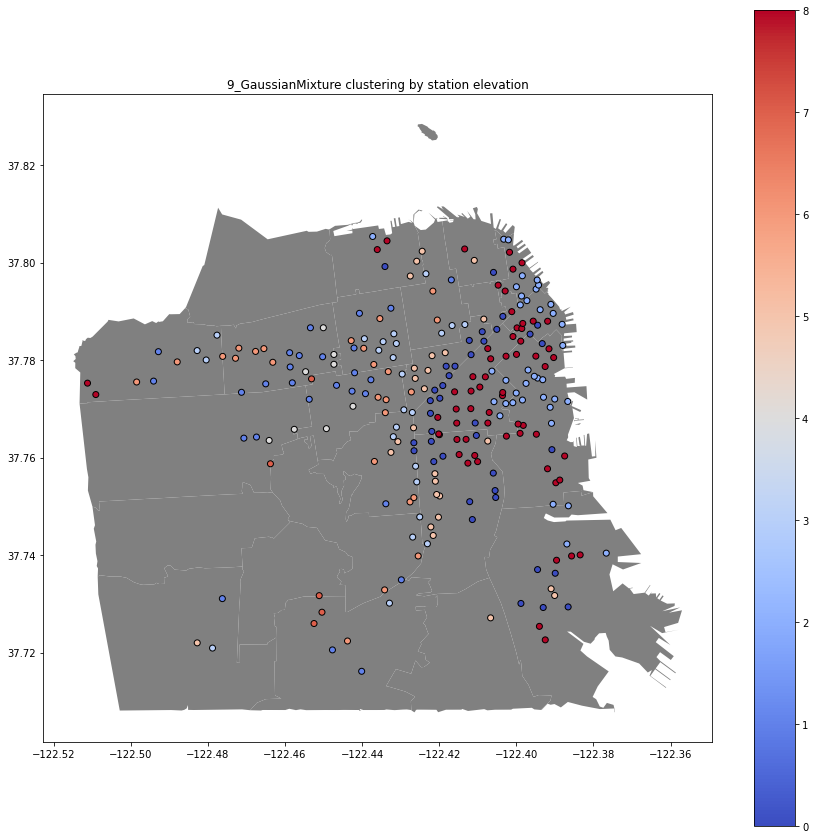

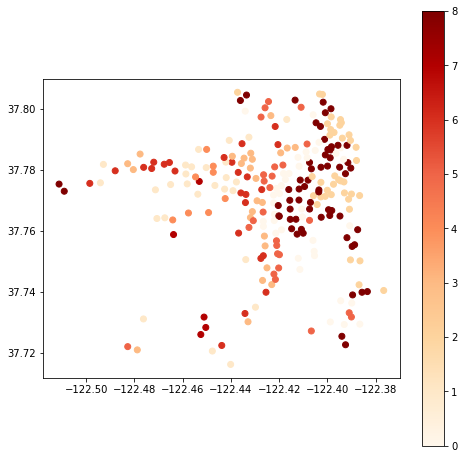

In [72]:
sf_merge2=sf.merge(res2,left_on='station_id', right_on='geometry')
gdf_dt3= gpd.GeoDataFrame(sf_merge2,geometry=gpd.points_from_xy(sf_merge2.lng, sf_merge2.lat)).set_crs('EPSG:4326')
plot_stations(zipcode, gdf_dt3, 'label', '9_GaussianMixture clustering by station elevation')
gdf_dt3.plot(figsize=(8,8), column='label', legend = True, cmap='OrRd')

**Part 2**

In [137]:
ebike1 = pd.read_csv('/content/drive/MyDrive/exports/sf_ebike_lat.csv' , index_col=0 )
cbike1 = pd.read_csv('/content/drive/MyDrive/exports/sf_cbike_lat.csv' , index_col=0 )
ebike2 = pd.read_csv('/content/drive/MyDrive/exports/sf_ebike_id.csv' , index_col=0 )
cbike2 = pd.read_csv('/content/drive/MyDrive/exports/sf_cbike_id.csv' , index_col=0 )

In [138]:
cbike1

,start_lng,start_lat,end_lat,end_lng,displacement,duration,velocity,count
0,-122.511210,37.775267,37.763521,-122.464100,4350.586611,1397.333333,3.117218,6
1,-122.511210,37.775267,37.763992,-122.470656,3785.890419,1817.800000,2.235654,5
2,-122.511210,37.775267,37.765796,-122.457589,4839.788141,2476.000000,1.954680,1
3,-122.511210,37.775267,37.769246,-122.426960,7452.698125,1778.000000,4.191619,1
4,-122.511210,37.775267,37.771954,-122.453703,5079.790400,1303.500000,3.898416,2
...,...,...,...,...,...,...,...,...
11496,-121.870099,37.320316,37.333930,-121.877358,1642.252111,836.500000,2.086742,2
11497,-121.870099,37.320316,37.364051,-121.911769,6098.717254,1720.000000,3.545809,2
11498,-121.866577,37.338573,37.332880,-121.875708,1026.618828,1044.000000,0.983351,1
11499,-121.866577,37.338573,37.335909,-121.885611,1712.398837,764.000000,2.241360,1


In [139]:
ebike2

,start_station_id,end_station_id,displacement,duration,velocity,count
0,SF I29-1,SF-A20,4246.657658,1751.0,2.425276,1
1,SF I29-1,SF-C20,3997.653612,1790.0,2.233326,1
2,SF I29-1,SF-C21,3384.185040,1426.0,2.373201,1
3,SF I29-1,SF-C28-2,1821.659008,626.0,2.909998,1
4,SF I29-1,SF-D27,1667.228247,802.0,2.078838,1
...,...,...,...,...,...,...
14421,SJ-Q8,SJ-I11,4026.436323,883.0,4.559951,1
14422,SJ-Q8,SJ-J10,3604.459938,1870.0,1.927519,1
14423,SJ-Q8,SJ-P8,700.729185,1289.0,0.543622,1
14424,SJ-Q8,SJ-Q4,1615.732189,2106.0,0.767204,1


In [141]:
ebike2= ebike2.merge(sf,left_on='start_station_id', right_on='station_id')
ebike2= ebike2.merge(sf,left_on='end_station_id', right_on='station_id')
ebike2

,start_station_id,end_station_id,displacement,duration,velocity,count,station_id_x,lat_x,lng_x,elevation_x,station_id_y,lat_y,lng_y,elevation_y
0,SF I29-1,SF-A20,4246.657658,1751.000000,2.425276,1,SF I29-1,37.783375,-122.393276,18,SF-A20,37.804438,-122.433527,7
1,SF-A19,SF-A20,342.755147,731.000000,2.012951,4,SF-A19,37.805339,-122.437250,4,SF-A20,37.804438,-122.433527,7
2,SF-B19,SF-A20,298.473799,1633.000000,0.182776,1,SF-B19,37.802650,-122.436059,8,SF-A20,37.804438,-122.433527,7
3,SF-B22,SF-A20,836.963820,215.000000,4.106134,2,SF-B22,37.802312,-122.424409,30,SF-A20,37.804438,-122.433527,7
4,SF-B25,SF-A20,1782.643505,653.600000,3.100656,5,SF-B25,37.802778,-122.413393,10,SF-A20,37.804438,-122.433527,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13944,SF-Z7,SF-Z6,369.461287,605.666667,1.569054,3,SF-Z7,37.720948,-122.478786,40,SF-Z6,37.722018,-122.482754,31
13945,SF-M30,SF-Y25,4641.119534,1101.666667,4.216037,3,SF-M30,37.767031,-122.390874,4,SF-Y25,37.727140,-122.406664,27
13946,SF-O30,SF-Y25,4076.392575,990.750000,4.209346,4,SF-O30,37.761629,-122.390766,13,SF-Y25,37.727140,-122.406664,27
13947,SF-P22,SF-Y25,3518.935270,1356.000000,2.595085,1,SF-P22,37.756698,-122.421106,23,SF-Y25,37.727140,-122.406664,27


In [142]:
ebike2['diff']=ebike2['elevation_x']-ebike2['elevation_y']

In [143]:
cols = ['start_station_id',	'end_station_id']
ebike2['start_end_id'] = ebike2[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
len(ebike2['start_end_id'].unique())
ebike2

,start_station_id,end_station_id,displacement,duration,velocity,count,station_id_x,lat_x,lng_x,elevation_x,station_id_y,lat_y,lng_y,elevation_y,diff,start_end_id
0,SF I29-1,SF-A20,4246.657658,1751.000000,2.425276,1,SF I29-1,37.783375,-122.393276,18,SF-A20,37.804438,-122.433527,7,11,SF I29-1_SF-A20
1,SF-A19,SF-A20,342.755147,731.000000,2.012951,4,SF-A19,37.805339,-122.437250,4,SF-A20,37.804438,-122.433527,7,-3,SF-A19_SF-A20
2,SF-B19,SF-A20,298.473799,1633.000000,0.182776,1,SF-B19,37.802650,-122.436059,8,SF-A20,37.804438,-122.433527,7,1,SF-B19_SF-A20
3,SF-B22,SF-A20,836.963820,215.000000,4.106134,2,SF-B22,37.802312,-122.424409,30,SF-A20,37.804438,-122.433527,7,23,SF-B22_SF-A20
4,SF-B25,SF-A20,1782.643505,653.600000,3.100656,5,SF-B25,37.802778,-122.413393,10,SF-A20,37.804438,-122.433527,7,3,SF-B25_SF-A20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13944,SF-Z7,SF-Z6,369.461287,605.666667,1.569054,3,SF-Z7,37.720948,-122.478786,40,SF-Z6,37.722018,-122.482754,31,9,SF-Z7_SF-Z6
13945,SF-M30,SF-Y25,4641.119534,1101.666667,4.216037,3,SF-M30,37.767031,-122.390874,4,SF-Y25,37.727140,-122.406664,27,-23,SF-M30_SF-Y25
13946,SF-O30,SF-Y25,4076.392575,990.750000,4.209346,4,SF-O30,37.761629,-122.390766,13,SF-Y25,37.727140,-122.406664,27,-14,SF-O30_SF-Y25
13947,SF-P22,SF-Y25,3518.935270,1356.000000,2.595085,1,SF-P22,37.756698,-122.421106,23,SF-Y25,37.727140,-122.406664,27,-4,SF-P22_SF-Y25


In [144]:
ebike2.columns

Index(['start_station_id', 'end_station_id', 'displacement', 'duration',
       'velocity', 'count', 'station_id_x', 'lat_x', 'lng_x', 'elevation_x',
       'station_id_y', 'lat_y', 'lng_y', 'elevation_y', 'diff',
       'start_end_id'],
      dtype='object')

In [152]:
ebike_cal= ebike2[['start_end_id','displacement', 'duration','velocity','diff','count']]
ebike_cal2= ebike2[['start_end_id','diff','count']]


In [154]:
ebike_cal2= ebike_cal2.set_index('start_end_id')
ebike_cal2

,diff,count
start_end_id,,
SF I29-1_SF-A20,11,1
SF-A19_SF-A20,-3,4
SF-B19_SF-A20,1,1
SF-B22_SF-A20,23,2
SF-B25_SF-A20,3,5
...,...,...
SF-Z7_SF-Z6,9,3
SF-M30_SF-Y25,-23,3
SF-O30_SF-Y25,-14,4


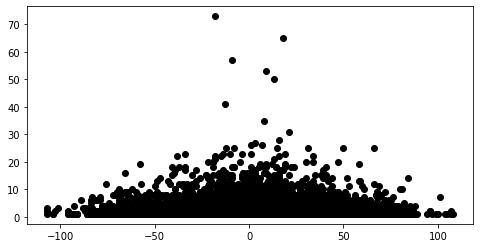

In [167]:
X= ebike_cal2.values
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],X[:,1],c="k")
plt.show()

In [162]:
rr=KMeans(n_clusters=5, n_init=10, random_state=0).fit(X)
rr.labels_ = rr.predict(X) 

In [160]:
n= 3 # number of clusters
tar=X # real target

#train the model
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(X)
print(res.labels_)

[2 2 2 ... 2 2 0]


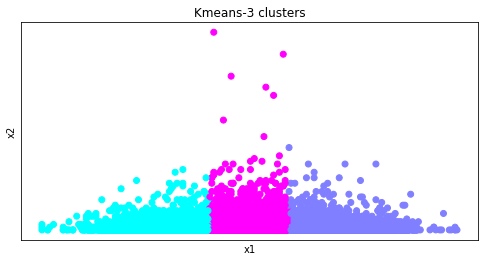

In [164]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.show()

In [153]:
ebike_cal= ebike_cal.set_index('start_end_id')
ebike_cal

,displacement,duration,velocity,diff,count
start_end_id,,,,,
SF I29-1_SF-A20,4246.657658,1751.000000,2.425276,11,1
SF-A19_SF-A20,342.755147,731.000000,2.012951,-3,4
SF-B19_SF-A20,298.473799,1633.000000,0.182776,1,1
SF-B22_SF-A20,836.963820,215.000000,4.106134,23,2
SF-B25_SF-A20,1782.643505,653.600000,3.100656,3,5
...,...,...,...,...,...
SF-Z7_SF-Z6,369.461287,605.666667,1.569054,9,3
SF-M30_SF-Y25,4641.119534,1101.666667,4.216037,-23,3
SF-O30_SF-Y25,4076.392575,990.750000,4.209346,-14,4


In [155]:
Kmean_range(10,ebike_cal2)

For n_clusters =2, the average silhouette_score is :0.4948093181127522
For n_clusters =3, the average silhouette_score is :0.5671507615021268
For n_clusters =4, the average silhouette_score is :0.48981240337484655
For n_clusters =5, the average silhouette_score is :0.5082304095062121
For n_clusters =6, the average silhouette_score is :0.4877770015768034
For n_clusters =7, the average silhouette_score is :0.49389846931393383
For n_clusters =8, the average silhouette_score is :0.47869023345842376
For n_clusters =9, the average silhouette_score is :0.4767678147730117


In [149]:
Kmean_range(10,ebike_cal)

For n_clusters =2, the average silhouette_score is :0.5572650938188536
For n_clusters =3, the average silhouette_score is :0.5109364404374449
For n_clusters =4, the average silhouette_score is :0.46940061504595554
For n_clusters =5, the average silhouette_score is :0.45000494745499886
For n_clusters =6, the average silhouette_score is :0.4241432336065509
For n_clusters =7, the average silhouette_score is :0.3993555256906729
For n_clusters =8, the average silhouette_score is :0.38442953545944114
For n_clusters =9, the average silhouette_score is :0.39403019168620784


In [148]:
GaussianMixture_range(10,ebike_cal)

For n_clusters =2, the average silhouette_score is :0.490899684691279
For n_clusters =3, the average silhouette_score is :0.42471074069385323
For n_clusters =4, the average silhouette_score is :0.3839792666641849
For n_clusters =5, the average silhouette_score is :0.4076582414730796
For n_clusters =6, the average silhouette_score is :0.37250604414661215
For n_clusters =7, the average silhouette_score is :0.3846828067678665
For n_clusters =8, the average silhouette_score is :0.4327684074444098
For n_clusters =9, the average silhouette_score is :0.4474197181771069
